# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [22]:
#!pip install matplotlib
#!pip install seaborn
#!pip install scikit-learn

import pandas as pd

tabela = pd.read_csv('slr12.csv', sep=";")
#tabela = pd.read_csv("advertising.csv")
display(tabela)

,FrqAnual,CusInic
0,1000,1050
1,1125,1150
2,1087,1213
3,1070,1275
4,1100,1300
5,1150,1300
6,1250,1400
7,1150,1400
8,1100,1250
9,1350,1830


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

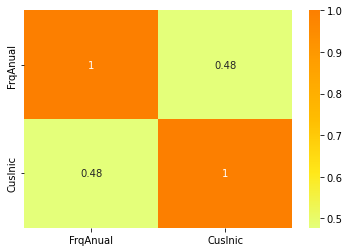

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

#cria o grafico
sns.heatmap(tabela.corr(), cmap="Wistia", annot=True)

#mostra o grafico
plt.show()


#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [44]:
y = tabela["CusInic"]
x = tabela[["FrqAnual"]]

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.2)


#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#criar os modelos
modelo_regressaolinear = LinearRegression()
modelo_randomforest = RandomForestRegressor()

#treinar os modelos
modelo_regressaolinear.fit(x_treino,y_treino)
modelo_randomforest.fit(x_treino,y_treino)


RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [46]:
#testar os modelos
teste_regressaolinear = modelo_regressaolinear.predict(x_teste)
teste_randomforest = modelo_randomforest.predict(x_teste)

#comparar os modelos
from sklearn import metrics

print(metrics.r2_score(y_teste,teste_regressaolinear))
print(metrics.r2_score(y_teste,teste_randomforest))

0.11830964071581862
0.3386310114083104


#### Visualização Gráfica das Previsões

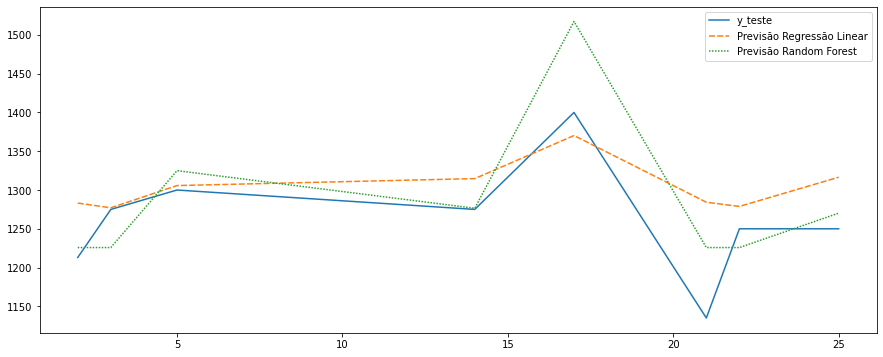

In [47]:
#Random Forest é o melhor modelo
tabela_aux = pd.DataFrame()
tabela_aux["y_teste"] = y_teste
tabela_aux["Previsão Regressão Linear"] = teste_regressaolinear
tabela_aux["Previsão Random Forest"] = teste_randomforest

plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_aux)
plt.show()

#### Como fazer uma nova previsão?

In [48]:
#importar a nova tabela com as infos q deseja

#nova_tabela = pd.read_csv("novos.csv")
#display(nova_tabela)

#usar o modelo já treinado para prever a nova tabela
nova_previsao = modelo_randomforest.predict([[1100]])
print(modelo_regressaolinear.predict([[1100]]))
print(nova_previsao)

[1287.83046333]
[1268.51666667]


C:\Users\usuario\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
